<h1> Spam Classification using Features Engineering and Natural Language Processing with Neural Network</h1>

Wan Nazirul Hafeez, April 2018
### Introduction

As there are increasing numbers of mobile subscriber and the market demand of reaching customer personally, Short Message Service (SMS) has become a target of unsolicited text message known as Spam that resulting waste in time, money and privacy.

In this project, our goal is to predict or classify if a sms is spam or non-spam(ham) using two different technic for spam classification through **Features Engineering (Extraction/Selection)** and **Natural Language Processing (NLP)** before modelling with machine learning algorithm. We devided the classification process into five(5) main step that is:
- Data Import
- Data Preprocessing
- Data Exploratory
- Data Modelling
- Model Evaluation

Beside classic machine learning algorithm such _Support Vector Machine (SVM)_ and _Random Forest(RF)_ thar will be used as our based benchmark, we also introduced the use of Neural Network model based classifier _Multi-layer Perceptron (MLP)_ classifier algorithm that trains using Backpropagation.

Performance Measurement metrics for the modelling will use Accuracy, and Recall and False Positive Rate(FPR or type I error).

## 1. Import Data

The SMS Spam Collection v.1 is a public set of SMS labeled messages that have been collected for mobile phone spam research. It has one collection composed by 5,574 English, real and non-enconded messages, tagged according being legitimate (ham) or spam. The dataset are obtained online from <a href="http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/"> here</a>.

The dataset raw format are in plain text file and need to be converted to CSV format. We had stored a copy of dataset in the github.


In [54]:
import pandas as pd

#Load Data From github CSV
data = pd.read_csv('https://raw.githubusercontent.com/onezisone/sms_neural/master/smsORI2.csv')
data.head(5)

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
# Check the class distribution
data.Class.value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [3]:
# Check null value.
pd.DataFrame(data=data.sum().isnull(), columns=["Has null?"])

,Has null?
Class,False
SMS,False


# A) Features Engineering

## 1. Preprocessing for Features Extraction

In **Feature Extraction**, we want to create new features based on combination and transformation from existing feature set. This feature set able to maximize the learners ability to classify pattern. List of created features is number of: letters, words, spaces, alphanumeric,  all number, digits, capital, uniqe, punctuation, exclamation mark, and question mark.

In [55]:
sms = data
sms.columns = ['class','message']

sms["no_letters"] = sms["message"].apply(lambda x: len(x))
sms["no_words"] = sms["message"].apply(lambda x: len(str(x).split(' ' )))
sms["no_spaces"] = sms["message"].apply(lambda x: sum( l == " " for l in str(x)))
sms["no_alnum"] = sms["message"].apply(lambda x: sum( l.isalnum() for l in str(x)))
sms["no_notalnum"] = sms["message"].apply(lambda x: sum( not l.isalnum() for l in str(x)))
sms["no_alnum"] = sms["message"].apply(lambda x: sum( l.isalnum() for l in str(x)))
sms["no_digits"] = sms["message"].apply(lambda x: sum( l.isdigit() for l in str(x)))
sms["no_capital"] = sms["message"].apply(lambda x: sum (l.isupper() for l in str(x)))
sms["no_unique"] = sms["message"].apply(lambda x: len(set(str(x).split(' '))))
sms["no_punct"] = sms["message"].apply(lambda x: sum(str(x).count(punct) for punct in ".,:;" ))
sms["no_excl"] = sms["message"].apply(lambda x: sum(str(x).count(punct) for punct in "!" ))
sms["no_quest"] = sms["message"].apply(lambda x: sum(str(x).count(punct) for punct in "?" ))

# For some models the target label has to be int, float or bool
sms['class'] = (sms['class'] == 'spam')

In [5]:
sms.head(3)

,class,message,no_letters,no_words,no_spaces,no_alnum,no_notalnum,no_digits,no_capital,no_unique,no_punct,no_excl,no_quest
0,False,"Go until jurong point, crazy.. Available only ...",111,20,19,83,28,0,3,20,9,0,0
1,False,Ok lar... Joking wif u oni...,29,6,5,18,11,0,2,6,6,0,0
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,27,122,33,25,10,24,1,0,0


## 2. Exploratory analysis 

#### 2.1 Correlation Map

We can just use all the features however keeping the relevant features and disregard irrelevant one sounds better. From those new features we had created, we would like to see how each attributes will affect relative to the ham/spam class by using correlation values.

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

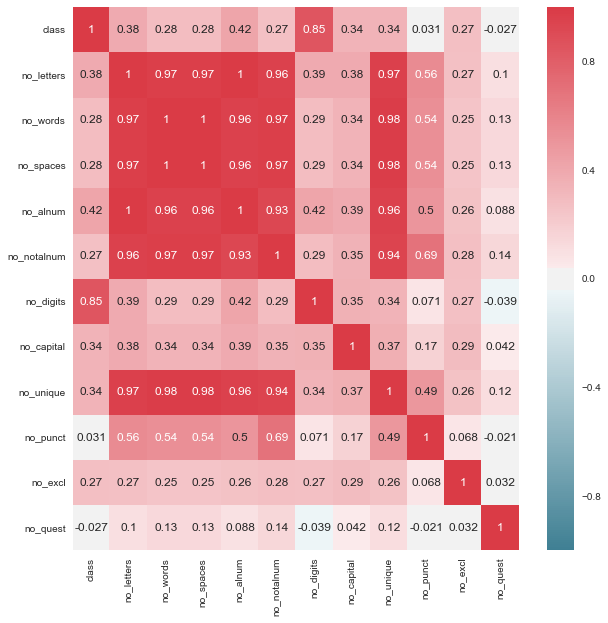

In [7]:
sms_corr = sms.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sms_corr, cmap=cmap, annot=True)
plt.show()

From the correlation map above, we can see that ***number of digit*** [0.85] in particular message having high positive correlation with the class label followed by ***number of alphanumeric***[0.42] and ***number of letters***[0.38] 

Meanwhile ***number of punctuation***[0.031] and ***number of question mark***[-0.027] are lossly correlated.

Therefore the highest three (3) attributes will be our pick for **Features Selection** in our model.

#### 2.2 Features Distribution 
Next we will plot the normalized histogram of both highly and lossely correlated attributes base from the correlation map above.

High:
- Number of letters (high)
- Number of alphanumeric (high)
- Number of digits (high)

Low:
- Number of punctuation (low)

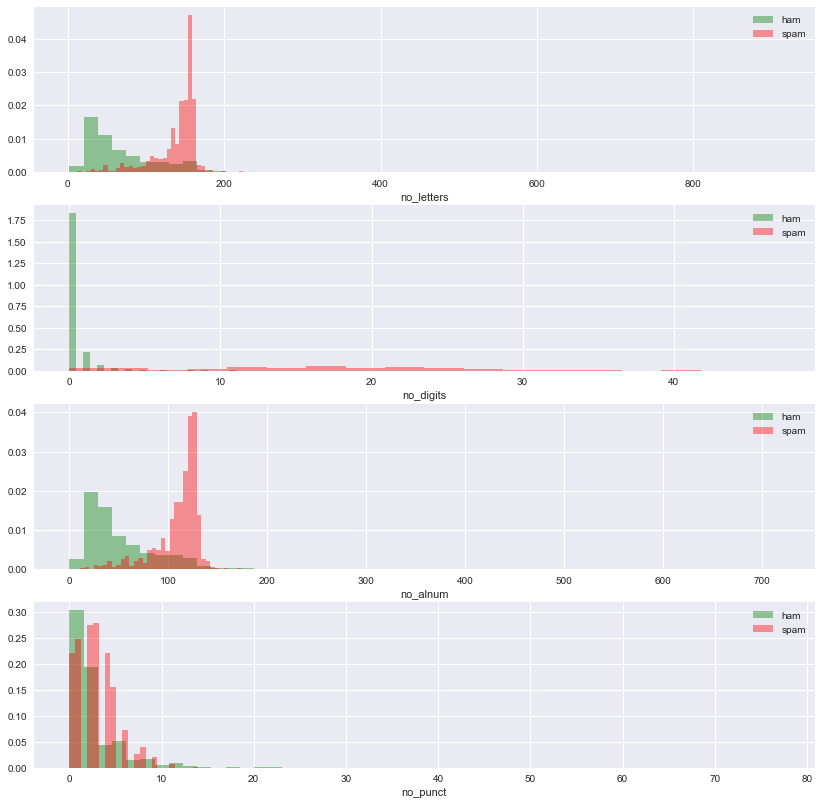

In [8]:
fig, ax = plt.subplots(4,1, figsize=(14, 14))

sns.distplot(sms[sms["class"] == 0]["no_letters"], color="green", label="ham", norm_hist=True, kde=False, ax=ax[0])
sns.distplot(sms[sms["class"] == 1]["no_letters"], color="red", label="spam", norm_hist=True, kde=False, ax=ax[0])
ax[0].legend()

sns.distplot(sms[sms["class"] == 0]["no_digits"], color="green", label="ham", norm_hist=True, kde=False, ax=ax[1])
sns.distplot(sms[sms["class"] == 1]["no_digits"], color="red", label="spam", norm_hist=True, kde=False, ax=ax[1])
ax[1].legend()

sns.distplot(sms[sms["class"] == 0]["no_alnum"], color="green", label="ham", norm_hist=True, kde=False, ax=ax[2])
sns.distplot(sms[sms["class"] == 1]["no_alnum"], color="red", label="spam", norm_hist=True, kde=False, ax=ax[2])
ax[2].legend()

sns.distplot(sms[sms["class"] == 0]["no_punct"], color="green", label="ham", norm_hist=True, kde=False, ax=ax[3])
sns.distplot(sms[sms["class"] == 1]["no_punct"], color="red", label="spam", norm_hist=True, kde=False, ax=ax[3])
ax[3].legend()

plt.show()

The first three histogram shows separable  distribution between ham & spam message. Therefore, it might be good features to select for the modelling. Just to show, ***number of punctuation*** in the last histogram show a closely inseparable-distribution between both class thus explain the it low correlation  value properties.

#### 2.3 Word Cloud

Next, we would like to visualize which word features the most and frequent for both ham & spam message by using word cloud technique.

In [10]:
ham_words = ''
spam_words = ''
spam = sms[sms["class"] == 1]
ham = sms[sms["class"] == 0]

ham_messages_train = pd.Series(sms[sms['class'] == 0]['message'].tolist()).astype(str)
spam_messages_train = pd.Series(sms[sms['class'] == 1]['message'].tolist()).astype(str)

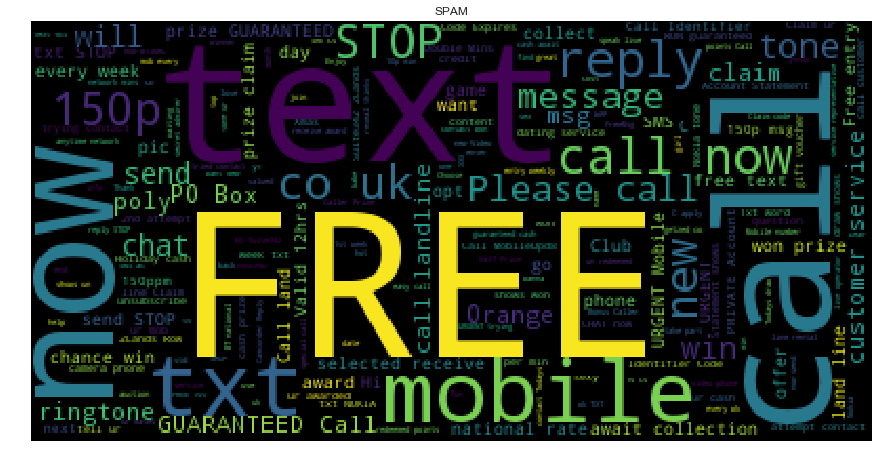

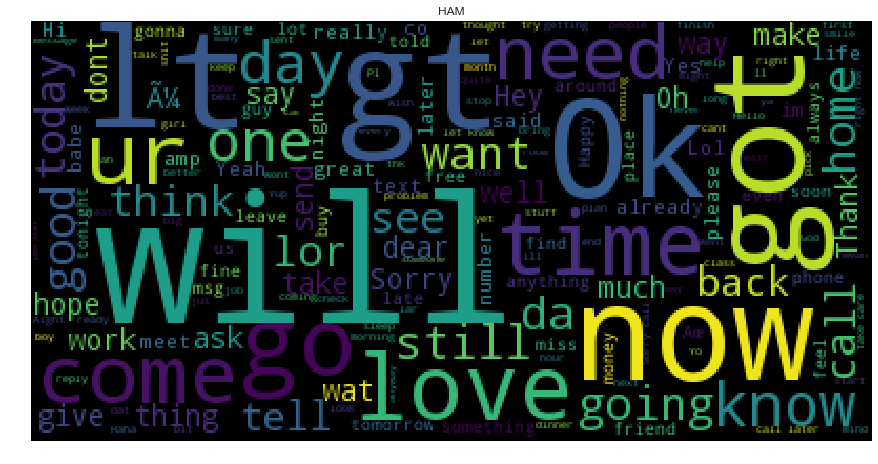

In [12]:
from wordcloud import WordCloud
# WordCloud automatically excludes stop words

# Draw word cloud for spam messages
spam_messages_one_string = " ".join(spam_messages_train.astype(str))
spam_cloud = WordCloud().generate(spam_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.title("SPAM")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Draw word cloud for ham messages
ham_messages_one_string = " ".join(ham_messages_train.astype(str))
ham_cloud = WordCloud().generate(ham_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(ham_cloud)
plt.title("HAM")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

There are obvious different top words for both spam and ham messages. 

Spam messages frequently include *Free, text, call, now, reply, please* etc. These words tend more towards grabbing user’s  attention and action to fall into their trap. There is also huge gap for the frequent and infrequent words used in spam as we can see in the visualization above.

Ham messages on the other hand shows different and more generic words such *will, ok, now, love, go and come.* These are the common word that we normally used in short messaging.

However, word *Now* appears frequent in both ham and spam messages. Therefore knowing the keywords alone might not give us a good classification.

## 3. Classification Modelling using Features Selection

Here we will start our modelling using three(3) selected features from correlation in previous section but first we have to split the train and test dataset. Sklearn libraries provides a simple function to implement the split.

#### Train test split dataset

In [56]:
from sklearn.model_selection import train_test_split

rs = 111
c_to_keep = ["no_letters", "no_digits", "no_alnum"]
X_train, X_test, y_train, y_test = train_test_split(sms[c_to_keep], sms["class"], test_size=0.2, train_size=0.8, random_state=rs)

#### Modelling

In [57]:
# Call the machine learning algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [58]:
from sklearn.metrics import accuracy_score

#SVM
SVM = SVC()
SVM.fit(X_train, y_train)
SVMpred = SVM.predict(X_test)
print("SVM Train accuracy:   %0.3f" % accuracy_score(y_train, SVM.predict(X_train)))
print("SVM Test accuracy:   %0.3f" % accuracy_score(y_test, SVMpred))
print('\n')

#RF
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RFpred = RF.predict(X_test)
print("RF Train accuracy:   %0.3f" % accuracy_score(y_train, RF.predict(X_train)))
print("RF Test accuracy:   %0.3f" % accuracy_score(y_test, RFpred))
print('\n')

#Neural Network
MLP = MLPClassifier(hidden_layer_sizes=(200, 100, 100, 50), activation='relu', solver='adam')
MLP.fit(X_train, y_train)
MLPpred = MLP.predict(X_test)
print("MLP Train accuracy:   %0.3f" % accuracy_score(y_train, MLP.predict(X_train)))
print("MLP Test accuracy:   %0.3f" % accuracy_score(y_test, MLPpred))

SVM Train accuracy:   0.990
SVM Test accuracy:   0.953


RF Train accuracy:   0.995
RF Test accuracy:   0.984


MLP Train accuracy:   0.973
MLP Test accuracy:   0.980


While all models give similar high training accuracy, RF give the highest result for both train and test accuracy. 
## 4. Performance Measurement

#### Confusion Matrix Function
We declare the necessary function to plot the confusion matrix.

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix

#Declare neccessary function for confusion matrix
y = np.array(sms['class'])
class_names = np.unique(y)
np.set_printoptions(precision=2)

#Function for plotting
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Confusion Matrix Plotting

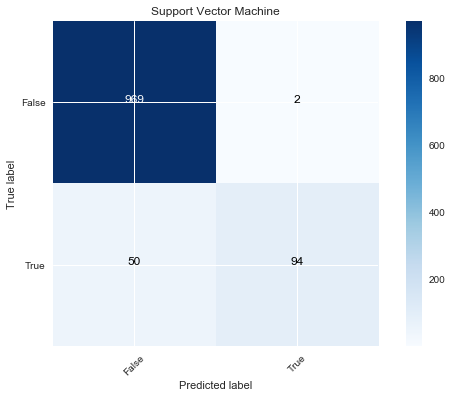

Number of SVM misclassified legitimate SMS as Spam: 2
Accuracy of SVM for Testing is:  0.9533632287
False Positive Rate:  0.205973223481
Recall: 65.2777777778


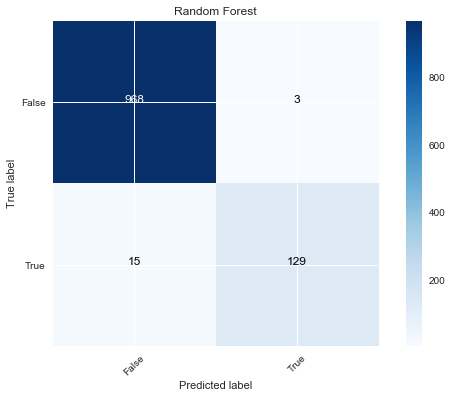

Number of RF misclassified legitimate SMS as Spam: 3
Accuracy of RF for Testing is:  0.983856502242
False Positive Rate:  0.308959835221
Recall: 89.5833333333


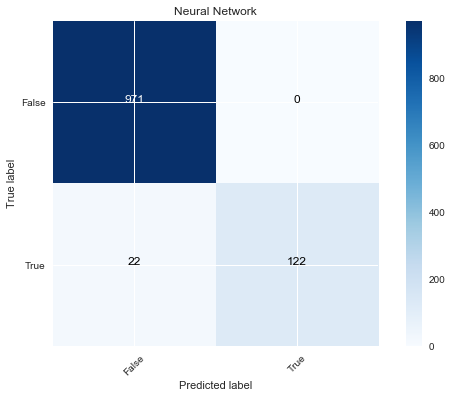

Number of MLP misclassified legitimate SMS as Spam: 0
Accuracy of MLP for Testing is:  0.980269058296
False Positive Rate:  0.0
Recall: 84.7222222222


In [60]:
import itertools
#from sklearn.metrics import classification_report 

cmSVM = confusion_matrix(y_test, SVMpred)
cmRF = confusion_matrix(y_test, RFpred)
cmMLP = confusion_matrix(y_test, MLPpred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cmSVM, classes=class_names,title='Support Vector Machine')
plt.show()
FP = cmSVM[0][1]
print('Number of SVM misclassified legitimate SMS as Spam:', FP)
print('Accuracy of SVM for Testing is: ',SVM.score(X_test,y_test))
print("False Positive Rate: ", (cmSVM[0][1]/(cmSVM[0][1]+cmSVM[0][0]))*100)
print('Recall:', (cmSVM[1][1]/(cmSVM[1][1]+cmSVM[1][0]))*100)
#print('Classification Report')
#print(classification_report(y_test, SVMpred))

plot_confusion_matrix(cmRF, classes=class_names,title='Random Forest')
plt.show()
FP = cmRF[0][1]
print('Number of RF misclassified legitimate SMS as Spam:', FP)
print('Accuracy of RF for Testing is: ',RF.score(X_test,y_test))
print("False Positive Rate: ", (cmRF[0][1]/(cmRF[0][1]+cmRF[0][0]))*100)
print('Recall:', (cmRF[1][1]/(cmRF[1][1]+cmRF[1][0]))*100)

plot_confusion_matrix(cmMLP, classes=class_names,title='Neural Network')
plt.show()
FP = cmMLP[0][1]
print('Number of MLP misclassified legitimate SMS as Spam:', FP)
print('Accuracy of MLP for Testing is: ',MLP.score(X_test,y_test))
print("False Positive Rate: ", (cmMLP[0][1]/(cmMLP[0][1]+cmMLP[0][0]))*100)
print('Recall:', (cmMLP[1][1]/(cmMLP[1][1]+cmMLP[1][0]))*100)

### Performance Analysis
The accuracy of modelling using features selection is 98.39% for Random Forest, 98.02% for Neural Network, and 95.37% for SVM. 

Based on our performance metrics, Random Forest give the highest value in two out of three metrics which is accuracy 98.4% and recall 89.58%.  All model shows False Positive Rate less than 1% with Neural Network performed the best with 0.0% value that non-misclassified ham message at all.  In term of classifying spam correctly, SVM performed worst with only 65% recall value while Random Forest and Neural Network give 89.58% and 84.72% respectively. 


# B) Natural Language Processing

This is another approach of classifying the text by using the words itself as the individual features. It intend to reflect how important each word in the whole text or corpus by vectorizing those words. The number of word occurence will be transform into weighing factor.  
## 1. Building Vectorize Classifier (TFIDF)

We used TFIDF vectorizer as it is the widely used term weighing schemes in domain of digital libraries as a text-based recommender. It able to eliminate the irrelevent word that occur too frequent in the corpus; which the 'inverse document frequency' come to play.

We begin by splitting the train and test dataset first before transforming into the TFIDF vector. Noted that we reinitialize the *sms['target']* as we want string of ham and spam to be our target label.

In [36]:
# Make training and test sets 
from sklearn.model_selection import train_test_split

sms['target'] = data.Class

#random reproducability
rs = 111
X_train, X_test, y_train, y_test = train_test_split(sms['message'], sms['target'], 
                                                    test_size=0.2, train_size=0.8, random_state=rs)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer() 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [38]:
# Get the feature names of `tfidf_vectorizer` 
print('TFIDF: ', tfidf_vectorizer.get_feature_names()[-40:])

TFIDF:  ['younger', 'youphone', 'your', 'youre', 'yourinclusive', 'yourjob', 'yours', 'yourself', 'youuuuu', 'youwanna', 'youâ', 'yoville', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zouk', 'zyada', 'ãº1', 'ã¼', 'ãœ', 'œharry']


In [39]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head(3)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zouk,zyada,ãº1,ã¼,ãœ,œharry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now each word in the corpus has been vectorized and respective weight has been assigned as per output above.

## 2. Exploratory Analysis

#### Visualizing Data using t-SNE

Low dimensional data are easy to visually inspect. We can simply pick pairs of dimensions and plot them against each other. However, visualizing high dimension data for TFIDF above with 4459x7800 dimension is quite impossible. ***t-distributed Stochastic Neighbor Embedding*** or t-SNE is a tool for that. Instead of trying to preserve the global structure like many dimensionality reduction techniques, t-SNE tries to group local data points closer to each other. 

Related paper proposing this technique can be found <a href="http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf">here</a>.


In [47]:
from sklearn.decomposition import TruncatedSVD

vectors = tfidf_train
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4459 samples in 0.012s...
[t-SNE] Computed neighbors for 4459 samples in 1.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4459
[t-SNE] Computed conditional probabilities for sample 2000 / 4459
[t-SNE] Computed conditional probabilities for sample 3000 / 4459
[t-SNE] Computed conditional probabilities for sample 4000 / 4459
[t-SNE] Computed conditional probabilities for sample 4459 / 4459
[t-SNE] Mean sigma: 0.101240
[t-SNE] Computed conditional probabilities in 0.433s
[t-SNE] Iteration 50: error = 80.8505173, gradient norm = 0.0001790 (50 iterations in 16.131s)
[t-SNE] Iteration 100: error = 80.7878494, gradient norm = 0.0005712 (50 iterations in 13.141s)
[t-SNE] Iteration 150: error = 80.7406998, gradient norm = 0.0001706 (50 iterations in 11.531s)
[t-SNE] Iteration 200: error = 80.7363968, gradient norm = 0.0000945 (50 iterations in 10.387s)
[t-SNE] Iteration 250: error = 80.7361603, gradient norm = 0.00

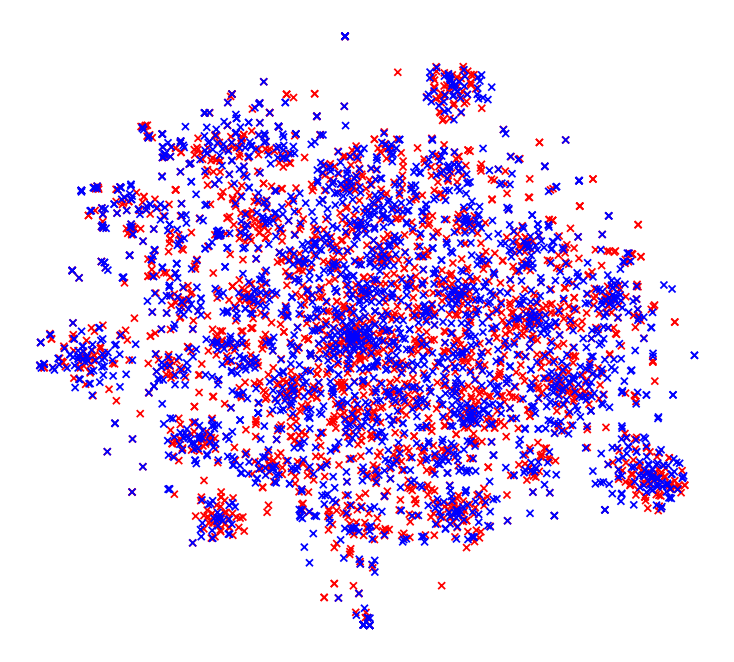

In [52]:
import numpy as np
import matplotlib.colors

colors=["red", "blue"]
cmap = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=np.arange(len(y_train)), marker="x", cmap=cmap)
plt.show()

The results show how ham and spam vector group almost together; the same or similar words might belong on both classes.

## 3. Classification using NLP

Here we will start our modelling using three(3) different classifier algorithm with word vector TFIDF as the input. As the data dimension is large, we interested to see the result using Neural Network compared to classical SVM and Random Forest algorithm.

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [50]:
from sklearn.metrics import accuracy_score

#SVM
SVM = SVC()
SVM.fit(tfidf_train, y_train)
SVMpred = SVM.predict(tfidf_test)
print("SVM Train accuracy:   %0.3f" % accuracy_score(y_train, SVM.predict(tfidf_train)))
print("SVM Test accuracy:   %0.3f" % accuracy_score(y_test, SVMpred))
print('\n')

#RF
RF = RandomForestClassifier()
RF.fit(tfidf_train, y_train)
RFpred = RF.predict(tfidf_test)
print("RF Train accuracy:   %0.3f" % accuracy_score(y_train, RF.predict(tfidf_train)))
print("RF Test accuracy:   %0.3f" % accuracy_score(y_test, RFpred))
print('\n')

#MLP
MLP = MLPClassifier(hidden_layer_sizes=(200, 100, 100, 50, 50), activation='relu', solver='adam')
MLP.fit(tfidf_train, y_train)
MLPpred = MLP.predict(tfidf_test)
print("MLP Train accuracy:   %0.3f" % accuracy_score(y_train, MLP.predict(tfidf_train)))
print("MLP Test accuracy:   %0.3f" % accuracy_score(y_test, MLPpred))

SVM Train accuracy:   0.865
SVM Test accuracy:   0.871


RF Train accuracy:   0.998
RF Test accuracy:   0.974


MLP Train accuracy:   1.000
MLP Test accuracy:   0.991


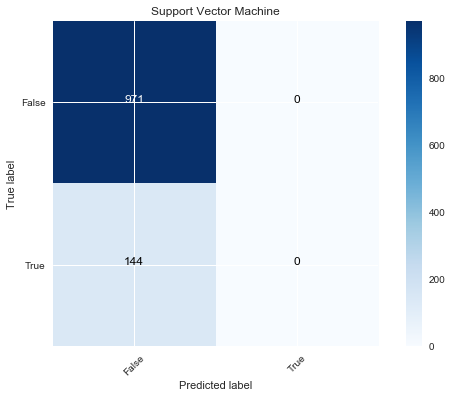

Number of SVM misclassified legitimate SMS as Spam: 0
Accuracy of SVM for Testing is:  0.870852017937
False Positive Rate:  0.0
Recall: 0.0


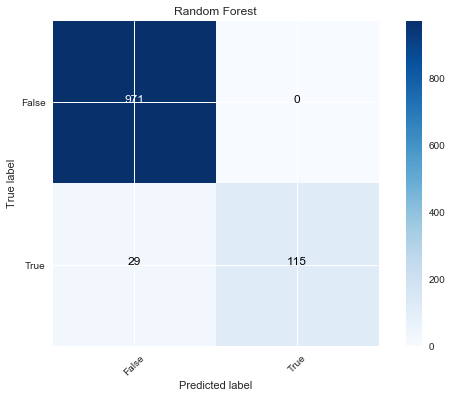

Number of RF misclassified legitimate SMS as Spam: 0
Accuracy of RF for Testing is:  0.97399103139
False Positive Rate:  0.0
Recall: 79.8611111111


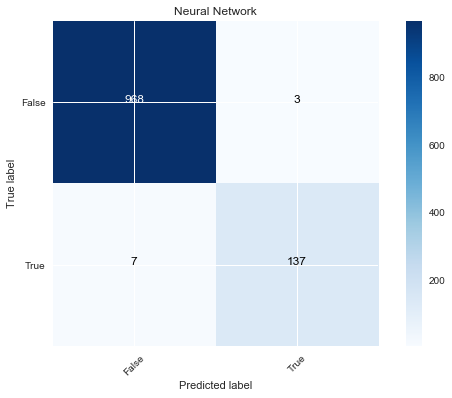

Number of MLP misclassified legitimate SMS as Spam: 3
Accuracy of MLP for Testing is:  0.991031390135
False Positive Rate:  0.308959835221
Recall: 95.1388888889


In [52]:
import itertools
from sklearn.metrics import confusion_matrix

cmSVM = confusion_matrix(y_test, SVMpred)
cmRF = confusion_matrix(y_test, RFpred)
cmMLP = confusion_matrix(y_test, MLPpred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cmSVM, classes=class_names,title='Support Vector Machine')
plt.show()
FP = cmSVM[0][1]
print('Number of SVM misclassified legitimate SMS as Spam:', FP)
print('Accuracy of SVM for Testing is: ',SVM.score(tfidf_test,y_test))
print("False Positive Rate: ", (cmSVM[0][1]/(cmSVM[0][1]+cmSVM[0][0]))*100)
print('Recall:', (cmSVM[1][1]/(cmSVM[1][1]+cmSVM[1][0]))*100)

plot_confusion_matrix(cmRF, classes=class_names,title='Random Forest')
plt.show()
FP = cmRF[0][1]
print('Number of RF misclassified legitimate SMS as Spam:', FP)
print('Accuracy of RF for Testing is: ',RF.score(tfidf_test,y_test))
print("False Positive Rate: ", (cmRF[0][1]/(cmRF[0][1]+cmRF[0][0]))*100)
print('Recall:', (cmRF[1][1]/(cmRF[1][1]+cmRF[1][0]))*100)

plot_confusion_matrix(cmMLP, classes=class_names,title='Neural Network')
plt.show()
FP = cmMLP[0][1]
print('Number of MLP misclassified legitimate SMS as Spam:', FP)
print('Accuracy of MLP for Testing is: ',MLP.score(tfidf_test,y_test))
print("False Positive Rate: ", (cmMLP[0][1]/(cmMLP[0][1]+cmMLP[0][0]))*100)
print('Recall:', (cmMLP[1][1]/(cmMLP[1][1]+cmMLP[1][0]))*100)

### Performance Analysis
The accuracy of modelling using natural language processing is 99.10% for Neural Network, 97.40% for Random Forest, and 87.08% for SVM. 

Based on our performance metrics, SVM model are unable to classify any spam message which give recall value of 0%. In term of classifying spam correctly, Neural Network and Random Forest give 95.14% and 79.86% respectively. Both SVM and Random Forest shows 0% of False Positive Rate while Neural Network give value of 0.31%.


## Discussion

Our performance metrics for classification with Features Engineering and Natural Language Processing shows Random Forest and Neural Network perform great at classifying spam and minimizing type I error. Acceptable error rate through significance level for type I error are less than 0.01 for both algorithm. 
The highest performance algorithm in overall is classification using NLP with Neural Network algorithm which scores accuracy of 99.10% and correctly classifying spam or recall value of 95.14%. We would like to investigate what is the messages content that fall into False Positive and False Negative in the following section. The trade-off of this algorithm is execution time needed to train the model is slightly higher and more hidden layer and neuron need to be added to further improve the performance.

There is obvious downfall for NLP with SVM as it couldn’t classify any spam message at all and hence no misclassified message too. SVM are based on the concept of decision planes that define decision boundaries thus it is not surprising as NLP using high dimension vector as shown on NLP visualization and it is very closely inseparable.


### **Extra: Misclassification Analysis

With ***NLP with Neural Network*** have the highest score recorded, we would like to understand and analyzed what is the message structure of the missclassified label for both ham and spam.

In [63]:
# Missclassified ham as spam
X_test[y_test < MLPpred ]

2289          Dont you have message offer
3890    Unlimited texts. Limited minutes.
Name: message, dtype: object

It might be that the message is too short for our classifier to analyse from the train dataset and lack of sample that can be used to train our model.

In [64]:
# Missclassified spam as ham
X_test[y_test > MLPpred ]

3864    Oh my god! I've found your number again! I'm s...
3132    LookAtMe!: Thanks for your purchase of a video...
2823    ROMCAPspam Everyone around should be respondin...
1500    SMS. ac JSco: Energy is high, but u may not kn...
1469    Hi its LUCY Hubby at meetins all day Fri & I w...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [69]:
# Full text on some of the the Missclassified spam
print(sms.iloc[1500].message)
print(sms.iloc[1469].message)

SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x CallsÂ£1/minMobsmoreLKPOBOX177HP51FL


By looking at the sample from above miss-spam, all of them having a long message structure with unique abbreviation such as “LookAtMe”, “JSCO”, and “LUCY”. These unique words might not exist in our training dataset. In feature works, we might include message length as our additional attribute to better classify the message.

# Conclusion
In this experiment, we present two approaches classifying with Features Engineering and Natural Language Processing and both shows a promising result. Features Engineering techniques proved that a plausible result can be obtained by manually extracting features from the message and selecting only few attributes (three) during feature selection process. Natural language processing on the other hand give the highest result due to high dimension data using word vector weighing scheme. Neural Network algorithm evolved well with both technique and better result can be achieved by adding additional hidden layer and neuron.